In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50

In [92]:
RAND_STATE = 42 
TT_RATIO = 0.3 

In [93]:
df= pd.read_csv("sexism_data.csv")
df

,id,dataset,text,toxicity,sexist,of_id
0,0,other,MENTION3481 i didn't even know random was an o...,0.118180,False,-1
1,1,other,Bottom two should've gone! #mkr,0.251850,False,-1
2,2,callme,MENTION3111 MENTION3424 ladyboner deserves so ...,0.113331,False,-1
3,3,other,She shall now be known as Sourpuss #MKR #KatAn...,0.531153,False,-1
4,4,other,Tarah W threw a bunch of women under the bus s...,0.118718,False,-1
...,...,...,...,...,...,...
13626,13630,callme,this reminds me of the MENTION3079 situation; ...,0.147044,False,-1
13627,13631,other,#mkr I love Annie and loyld there like a real ...,0.213106,False,-1
13628,13632,other,No u. http://t.co/zOr0eWahSS,0.324702,False,-1
13629,13633,other,#mkr the way kat looks at Annie is like she's ...,0.563036,False,-1


In [94]:
df.drop(['id','dataset','toxicity','of_id'], axis =1, inplace = True)
df

,text,sexist
0,MENTION3481 i didn't even know random was an o...,False
1,Bottom two should've gone! #mkr,False
2,MENTION3111 MENTION3424 ladyboner deserves so ...,False
3,She shall now be known as Sourpuss #MKR #KatAn...,False
4,Tarah W threw a bunch of women under the bus s...,False
...,...,...
13626,this reminds me of the MENTION3079 situation; ...,False
13627,#mkr I love Annie and loyld there like a real ...,False
13628,No u. http://t.co/zOr0eWahSS,False
13629,#mkr the way kat looks at Annie is like she's ...,False


In [95]:
df.isna().any()

text      False
sexist    False
dtype: bool

In [96]:
df = df.drop_duplicates()
print(df)

                                                    text  sexist
0      MENTION3481 i didn't even know random was an o...   False
1                       Bottom two should've gone!  #mkr   False
2      MENTION3111 MENTION3424 ladyboner deserves so ...   False
3      She shall now be known as Sourpuss #MKR #KatAn...   False
4      Tarah W threw a bunch of women under the bus s...   False
...                                                  ...     ...
13626  this reminds me of the MENTION3079 situation; ...   False
13627  #mkr I love Annie and loyld there like a real ...   False
13628                       No u. http://t.co/zOr0eWahSS   False
13629  #mkr the way kat looks at Annie is like she's ...   False
13630  #mkr omg the kiss stains on the "dirty" mirror...   False

[13345 rows x 2 columns]


In [97]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

import re

[nltk_data] Downloading package punkt to /Users/mm527x/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mm527x/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [98]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import string

# Load the stop words
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Initialize the stemmer
stemmer = PorterStemmer()

# Define a function to preprocess the text
def preprocess_text(text):
    # Normalize the text to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stop words
    tokens = [token for token in tokens if token not in stop_words]
    # Perform stemming
    tokens = [stemmer.stem(token) for token in tokens]
    # Join the tokens back into a string
    text = ' '.join(tokens)
    return text

# Apply the preprocessing function to the 'text' column of your DataFrame
df['processed_text'] = df['text'].apply(preprocess_text)

# Save the processed dataset
df.to_csv('processed_dataset.csv', index=False)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mm527x/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/var/folders/n_/mqs2n84x0k3g_vz_3dbgh2yr0000gp/T/ipykernel_27695/4278759684.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['processed_text'] = df['text'].apply(preprocess_text)


In [99]:
import nltk
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/mm527x/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [100]:
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /Users/mm527x/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [101]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /Users/mm527x/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [102]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import string

# Load the stop words
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Define a function to preprocess the text
def preprocess_text(text):
    # Normalize the text to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stop words
    tokens = [token for token in tokens if token not in stop_words]
    # Perform lemmatization
    tokens = [lemmatizer.lemmatize(token, pos='v') if nltk.pos_tag([token])[0][1].startswith('V') else lemmatizer.lemmatize(token) for token in tokens]
    # Join the tokens back into a string
    text = ' '.join(tokens)
    return text

# Apply the preprocessing function to the 'text' column of your DataFrame
df['lem_text'] = df['text'].apply(preprocess_text)

# Save the processed dataset
df.to_csv('processed_dataset.csv', index=False)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mm527x/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/var/folders/n_/mqs2n84x0k3g_vz_3dbgh2yr0000gp/T/ipykernel_27695/4138028413.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lem_text'] = df['text'].apply(preprocess_text)


In [103]:
processed_df=pd.read_csv("processed_dataset.csv")

In [104]:
processed_df['sexist'] = processed_df['sexist'].astype(int)

In [105]:
processed_df

,text,sexist,processed_text,lem_text
0,MENTION3481 i didn't even know random was an o...,0,mention3481 didnt even know random option,mention3481 didnt even know random option
1,Bottom two should've gone! #mkr,0,bottom two shouldv gone mkr,bottom two shouldve go mkr
2,MENTION3111 MENTION3424 ladyboner deserves so ...,0,mention3111 mention3424 ladybon deserv much cr...,mention3111 mention3424 ladyboner deserves muc...
3,She shall now be known as Sourpuss #MKR #KatAn...,0,shall known sourpuss mkr katandr failedfoodi,shall know sourpuss mkr katandre failedfoodies
4,Tarah W threw a bunch of women under the bus s...,0,tarah w threw bunch women bu could get wadhwa ...,tarah w threw bunch woman bus could get wadhwa...
...,...,...,...,...
13340,this reminds me of the MENTION3079 situation; ...,0,remind mention3079 situat sorri actual dont ca...,reminds mention3079 situation sorry actually d...
13341,#mkr I love Annie and loyld there like a real ...,0,mkr love anni loyld like real life disney coup...,mkr love annie loyld like real life disney cou...
13342,No u. http://t.co/zOr0eWahSS,0,u httptcozor0ewahss,u httptcozor0ewahss
13343,#mkr the way kat looks at Annie is like she's ...,0,mkr way kat look anni like she stear soul creepi,mkr way kat look annie like shes stearing soul...


In [106]:
print(processed_df['sexist'].value_counts())

0    11538
1     1807
Name: sexist, dtype: int64


In [107]:
df_stem=processed_df[['processed_text','sexist']]
df_lem=processed_df[['lem_text','sexist']]

In [108]:
df_stem

,processed_text,sexist
0,mention3481 didnt even know random option,0
1,bottom two shouldv gone mkr,0
2,mention3111 mention3424 ladybon deserv much cr...,0
3,shall known sourpuss mkr katandr failedfoodi,0
4,tarah w threw bunch women bu could get wadhwa ...,0
...,...,...
13340,remind mention3079 situat sorri actual dont ca...,0
13341,mkr love anni loyld like real life disney coup...,0
13342,u httptcozor0ewahss,0
13343,mkr way kat look anni like she stear soul creepi,0


In [52]:
df_lem

,lem_text,sexist
0,mention3481 didnt even know random option,0
1,bottom two shouldve go mkr,0
2,mention3111 mention3424 ladyboner deserves muc...,0
3,shall know sourpuss mkr katandre failedfoodies,0
4,tarah w threw bunch woman bus could get wadhwa...,0
...,...,...
13340,reminds mention3079 situation sorry actually d...,0
13341,mkr love annie loyld like real life disney cou...,0
13342,u httptcozor0ewahss,0
13343,mkr way kat look annie like shes stearing soul...,0


# Lem DF - Train

In [109]:
from sklearn.model_selection import train_test_split

# Split the DataFrame into training and testing sets
lem_train_df, lem_test_df = train_test_split(df_lem, test_size=0.25, random_state=42)

# Print the shape of the resulting DataFrames
print(f"Training set shape: {lem_train_df.shape}")
print(f"Testing set shape: {lem_test_df.shape}")

Training set shape: (10008, 2)
Testing set shape: (3337, 2)


In [110]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Get the training and testing texts and labels
lem_train_texts = lem_train_df['lem_text']
lem_train_labels = lem_train_df['sexist']
lem_test_texts = lem_test_df['lem_text']
lem_test_labels = lem_test_df['sexist']

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()
train_features = vectorizer.fit_transform(lem_train_texts)  # Transform the training texts

# Transform the testing texts using the same vectorizer
test_features = vectorizer.transform(lem_test_texts)

# Create an SVM classifier
classifier = SVC()

# Train the classifier
classifier.fit(train_features, lem_train_labels)

# Make predictions on the test set
predictions = classifier.predict(test_features)

# Calculate accuracy
accuracy = accuracy_score(lem_test_labels, predictions)
print(f"Accuracy: {accuracy:.4f}")

# Generate classification report
report = classification_report(lem_test_labels, predictions)
print("Classification Report:")
print(report)


Accuracy: 0.8894
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.94      2884
           1       0.65      0.41      0.50       453

    accuracy                           0.89      3337
   macro avg       0.78      0.69      0.72      3337
weighted avg       0.88      0.89      0.88      3337



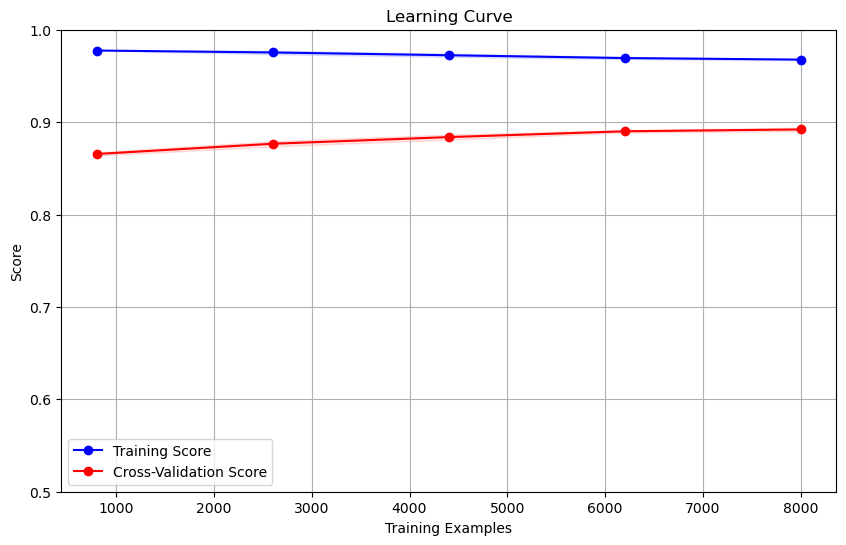

In [111]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Define the SVM classifier
classifier = SVC()

# Define the train_sizes
train_sizes = np.linspace(0.1, 1.0, 10)

# Calculate the learning curve scores
train_sizes, train_scores, test_scores = learning_curve(classifier, train_features, lem_train_labels, cv=5)

# Calculate the mean and standard deviation of the training and testing scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.grid(True)
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='b')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='r')
plt.plot(train_sizes, train_mean, 'o-', color='b', label='Training Score')
plt.plot(train_sizes, test_mean, 'o-', color='r', label='Cross-Validation Score')
plt.ylim(0.5, 1.0)  # Adjust the y-axis limits to make the curves closer
plt.legend(loc='best')
plt.show()


In [112]:
X_train = lem_train_df['lem_text']
y_train = lem_train_df['sexist']
X_test = lem_test_df['lem_text']
y_test = lem_test_df['sexist']

In [113]:
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)


In [114]:
xgb_classifier = xgb.XGBClassifier()

In [115]:
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [116]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9008


In [117]:
y_true = lem_test_df['sexist'].values

In [118]:
from sklearn.metrics import precision_score
precision = precision_score(y_true, y_pred)

In [119]:
precision

0.645933014354067

In [120]:
from sklearn.metrics import recall_score
recall = recall_score(y_true, y_pred)
recall

0.5960264900662252

In [121]:
from sklearn.metrics import f1_score
f1 = f1_score(y_true, y_pred)
f1

0.6199770378874857

In [122]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_true, y_pred)
conf_matrix

array([[2736,  148],
       [ 183,  270]])

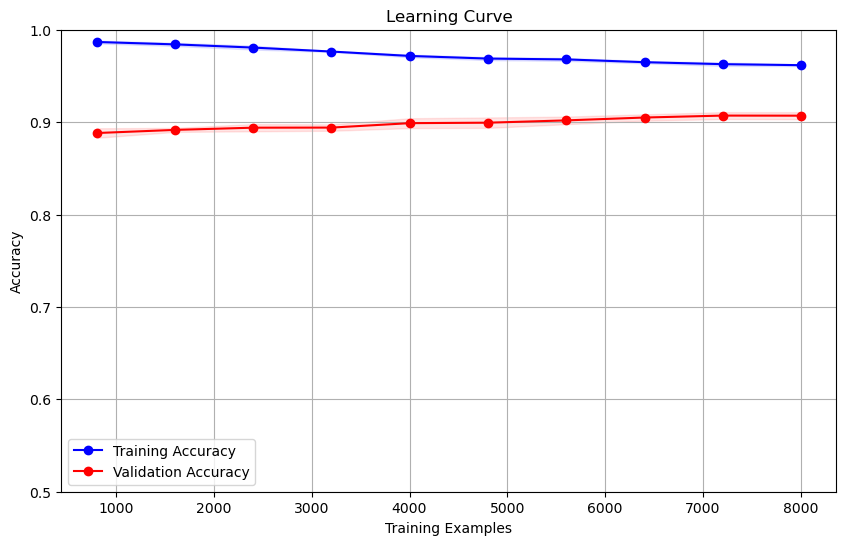

In [123]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

X_train = lem_train_df['lem_text']
y_train = lem_train_df['sexist']
X_test = lem_test_df['lem_text']
y_test = stem_test_df['sexist']

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

xgb_classifier = xgb.XGBClassifier()

# Define the train_sizes
train_sizes = np.linspace(0.1, 1.0, 10)

# Calculate the learning curve scores
train_sizes, train_scores, test_scores = learning_curve(
    xgb_classifier, X_train, y_train, cv=5, train_sizes=train_sizes, scoring='accuracy'
)

# Calculate the mean and standard deviation of train and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.grid(True)
plt.fill_between(
    train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std,
    alpha=0.1, color='b'
)
plt.fill_between(
    train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std,
    alpha=0.1, color='r'
)
plt.plot(train_sizes, train_scores_mean, 'o-', color='b', label='Training Accuracy')
plt.plot(train_sizes, test_scores_mean, 'o-', color='r', label='Validation Accuracy')
plt.ylim(0.5, 1.0)  # Adjust the y-axis limits to make the curves closer
plt.legend(loc='best')
plt.show()


In [124]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the metrics
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Generate classification report
report = classification_report(y_test, y_pred)
print(report)


Accuracy: 0.9008
Precision: 0.6459
Recall: 0.5960
F1-Score: 0.6200
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      2884
           1       0.65      0.60      0.62       453

    accuracy                           0.90      3337
   macro avg       0.79      0.77      0.78      3337
weighted avg       0.90      0.90      0.90      3337

